# Table of Content
1. Import libraries and data
2. Merging department and merged data frames
3. Create customers profiles
4. Profiles distribution visualization 
5. Aggregate the max, mean, and min variables 
6. Compare your customer profiles 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating the path to import data
path=r'C:\Users\maryg\OneDrive\Career Foundry-Data Anlytics\Data Analytics Immersion\10.2023 Instacart Basket Analysis'

In [3]:
#importing data frame
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_normal_activity.pkl'))

In [4]:
df_merged.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_last_order  product_id  add_to_cart_order  reordered  \
0                    NaN         196                  1          0   
1                   15.0         196                  1          1   
2                   21.0         196                  1          1   
3                   29.0         196                  1          1   
4                   28.0         196                  1          1   

  product_name  ...         frequency_flag  gender    state age date_joined  \
0         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
1         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
2         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
3         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   
4         Soda  ...  Non-frequent customer  Female  Alabama  31   2/17/2019   

  number_of_dependants marital_status income  region    activity_flag  
0                    3        married  40423   South  normal activity  
1                    3        married  40423   South  normal activity  
2                    3        married  40423   South  normal activity  
3                    3        married  40423   South  normal activity  
4                    3        married  40423   South  normal activity  

[5 rows x 33 columns]

In [5]:
df_merged.shape

(30964564, 33)

In [6]:
#Checking department_id
df_merged['department_id']

0           7
1           7
2           7
3           7
4           7
           ..
32404850    7
32404851    7
32404852    7
32404853    7
32404854    7
Name: department_id, Length: 30964564, dtype: int64

In [7]:
#Importing departments_t_wrangled dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_t_wrangled.csv'))

In [8]:
df_dept

Unnamed: 0       department
0            1           frozen
1            2            other
2            3           bakery
3            4          produce
4            5          alcohol
5            6    international
6            7        beverages
7            8             pets
8            9  dry goods pasta
9           10             bulk
10          11    personal care
11          12     meat seafood
12          13           pantry
13          14        breakfast
14          15     canned goods
15          16       dairy eggs
16          17        household
17          18           babies
18          19           snacks
19          20             deli
20          21          missing

In [9]:
#rename unnamed:0 column to department_id
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [10]:
df_dept

department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

# 2. Merging dataframes

In [11]:
#merging data frames
df_merged1 = df_merged.merge(df_dept, on = 'department_id')

In [12]:
df_merged1

order_id  user_id  order_number  orders_day_of_week  \
0          2539329        1             1                   2   
1          2398795        1             2                   3   
2           473747        1             3                   3   
3          2254736        1             4                   4   
4           431534        1             5                   4   
...            ...      ...           ...                 ...   
30964559    525976    58201            24                   6   
30964560    758290    58201            26                   0   
30964561    460711    58201            27                   6   
30964562   1605789    58201            28                   5   
30964563   1565024   152886             2                   1   

          order_hour_of_day  days_since_last_order  product_id  \
0                         8                    NaN         196   
1                         7                   15.0         196   
2                        12                   21.0         196   
3                         7                   29.0         196   
4                        15                   28.0         196   
...                     ...                    ...         ...   
30964559                 16                    3.0        5161   
30964560                 12                    9.0        5161   
30964561                  9                   13.0        5161   
30964562                  7                   27.0        5161   
30964563                  9                   30.0        1000   

          add_to_cart_order  reordered product_name  ...  gender  \
0                         1          0         Soda  ...  Female   
1                         1          1         Soda  ...  Female   
2                         1          1         Soda  ...  Female   
3                         1          1         Soda  ...  Female   
4                         1          1         Soda  ...  Female   
...                     ...        ...          ...  ...     ...   
30964559                  1          1  Dried Mango  ...    Male   
30964560                  1          1  Dried Mango  ...    Male   
30964561                  1          1  Dried Mango  ...    Male   
30964562                  1          1  Dried Mango  ...    Male   
30964563                  3          0     Apricots  ...    Male   

                 state  age date_joined number_of_dependants marital_status  \
0              Alabama   31   2/17/2019                    3        married   
1              Alabama   31   2/17/2019                    3        married   
2              Alabama   31   2/17/2019                    3        married   
3              Alabama   31   2/17/2019                    3        married   
4              Alabama   31   2/17/2019                    3        married   
...                ...  ...         ...                  ...            ...   
30964559       Florida   75    2/8/2019                    2        married   
30964560       Florida   75    2/8/2019                    2        married   
30964561       Florida   75    2/8/2019                    2        married   
30964562       Florida   75    2/8/2019                    2        married   
30964563  Pennsylvania   45    7/9/2017                    1        married   

          income     region    activity_flag department  
0          40423      South  normal activity  beverages  
1          40423      South  normal activity  beverages  
2          40423      South  normal activity  beverages  
3          40423      South  normal activity  beverages  
4          40423      South  normal activity  beverages  
...          ...        ...              ...        ...  
30964559  138066      South  normal activity       bulk  
30964560  138066      South  normal activity       bulk  
30964561  138066      South  normal activity       bulk  
30964562  138066      South  normal activity       bulk  
30964563   41662  Northeast  nor

In [13]:
df_merged1.shape

(30964564, 34)

# Creating cutomer profiles 

## Age Groups

In [14]:
df_merged1['age'].min()

18

In [15]:
df_merged1['age'].max()

81

In [ ]:
#create age groups between 18 and 81

In [16]:
#Age group 18 to 29
df_merged1.loc[(df_merged1['age'] >= 18) & (df_merged1['age'] <= 29), 'age_group'] = '18-29 years old'

C:\Users\maryg\AppData\Local\Temp\ipykernel_18392\662765740.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '18-29 years old' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged1.loc[(df_merged1['age'] >= 18) & (df_merged1['age'] <= 29), 'age_group'] = '18-29 years old'


In [17]:
#Age group 30 to 64
df_merged1.loc[(df_merged1['age'] >= 30) & (df_merged1['age'] <= 64), 'age_group'] = '30-44 years old'

In [18]:
#Age group 45 to 59
df_merged1.loc[(df_merged1['age'] >= 45) & (df_merged1['age'] <= 59), 'age_group'] = '45-59 years old'

In [19]:
#Age group 60 to 81
df_merged1.loc[(df_merged1['age'] >= 60) & (df_merged1['age'] <= 81), 'age_group'] = '60-81 years old'

In [20]:
df_merged1['age_group'].value_counts(dropna = False)

age_group
60-81 years old    10574504
45-59 years old     7311091
30-44 years old     7261366
18-29 years old     5817603
Name: count, dtype: int64

## Income Groups

In [21]:
df_merged1['income'].min()

25903

In [22]:
df_merged1['income'].max()

593901

In [23]:
df_merged1['income'].mean()

99675.86510754681

In [24]:
#Income ranges between $25,903 and $593,901

In [ ]:
#creating income groups 

In [25]:
#under $50K
df_merged1.loc[df_merged1['income']<50000,'income_group']='lower income'

C:\Users\maryg\AppData\Local\Temp\ipykernel_18392\4192137775.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'lower income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged1.loc[df_merged1['income']<50000,'income_group']='lower income'


In [26]:
#50,000 and $100,000
df_merged1.loc[(df_merged1['income']>=50000) & (df_merged1['income']<100000),'income_group']='middle income'

In [27]:
#$100,000 or more
df_merged1.loc[df_merged1['income'] >= 100000, 'income_group'] = 'high income'

In [28]:
df_merged1['income_group'].value_counts(dropna= False)

income_group
high income      14207402
middle income    13394608
lower income      3362554
Name: count, dtype: int64

## Dependant Groups

In [29]:
df_merged1['number_of_dependants'].min()

0

In [30]:
df_merged1['number_of_dependants'].mean()

1.501819176268718

In [31]:
df_merged1['number_of_dependants'].max()

3

In [ ]:
#Depandant count ranges from 0 to 3 dependants

In [32]:
#No dependant group
df_merged1.loc[df_merged1['number_of_dependants'] <= 0, 'dependants_group'] = 'no dependants'

C:\Users\maryg\AppData\Local\Temp\ipykernel_18392\2595104433.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'no dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged1.loc[df_merged1['number_of_dependants'] <= 0, 'dependants_group'] = 'no dependants'


In [33]:
#Has dependants
df_merged1.loc[df_merged1['number_of_dependants'] > 0, 'dependants_group'] = 'has dependants'

In [34]:
df_merged1['dependants_group'].value_counts(dropna = False)

dependants_group
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

In [35]:
df_merged1.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2398795        1             2                   3                  7   
2    473747        1             3                   3                 12   
3   2254736        1             4                   4                  7   
4    431534        1             5                   4                 15   

   days_since_last_order  product_id  add_to_cart_order  reordered  \
0                    NaN         196                  1          0   
1                   15.0         196                  1          1   
2                   21.0         196                  1          1   
3                   29.0         196                  1          1   
4                   28.0         196                  1          1   

  product_name  ...  date_joined  number_of_dependants  marital_status income  \
0         Soda  ...    2/17/2019                     3         married  40423   
1         Soda  ...    2/17/2019                     3         married  40423   
2         Soda  ...    2/17/2019                     3         married  40423   
3         Soda  ...    2/17/2019                     3         married  40423   
4         Soda  ...    2/17/2019                     3         married  40423   

  region    activity_flag department        age_group  income_group  \
0  South  normal activity  beverages  30-44 years old  lower income   
1  South  normal activity  beverages  30-44 years old  lower income   
2  South  normal activity  beverages  30-44 years old  lower income   
3  South  normal activity  beverages  30-44 years old  lower income   
4  South  normal activity  beverages  30-44 years old  lower income   

  dependants_group  
0   has dependants  
1   has dependants  
2   has dependants  
3   has dependants  
4   has dependants  

[5 rows x 37 columns]

## Creating Profiles with new groups

In [36]:
#Checking martial status counts
df_merged1['marital_status'].value_counts(dropna = False)

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [37]:
#Create a crosstab for 'marital_status' vs. 'dependants_group'
marital_dependants_crosstab =pd.crosstab(df_merged1['dependants_group'],df_merged1['marital_status'],dropna=False)

In [38]:
marital_dependants_crosstab.to_clipboard()

In [39]:
marital_dependants_crosstab

marital_status    divorced/widowed  living with parents and siblings  \
dependants_group                                                       
has dependants                   0                           1481172   
no dependants              2645271                                 0   

marital_status     married   single  
dependants_group                     
has dependants    21743711        0  
no dependants            0  5094410

In [40]:
#Create a crosstab for 'age_group' vs. 'dependants_group'
age_grp_dependants_crosstab =pd.crosstab(df_merged1['age_group'],df_merged1['dependants_group'],dropna=False)

In [41]:
age_grp_dependants_crosstab.to_clipboard()

In [42]:
age_grp_dependants_crosstab

dependants_group  has dependants  no dependants
age_group                                      
18-29 years old          4369985        1447618
30-44 years old          5442572        1818794
45-59 years old          5483093        1827998
60-81 years old          7929233        2645271

In [43]:
df_merged1['income_group'].value_counts(dropna= False)

income_group
high income      14207402
middle income    13394608
lower income      3362554
Name: count, dtype: int64

In [44]:
df_merged1['age_group'].value_counts(dropna = False)

age_group
60-81 years old    10574504
45-59 years old     7311091
30-44 years old     7261366
18-29 years old     5817603
Name: count, dtype: int64

In [ ]:
#Create a profiling variable based on age, marital status, and number of dependents

In [45]:
#single young adult w/o dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['dependants_group'] == 'no dependants'),'profile_1']= 'single young adult w/o dependants'

C:\Users\maryg\AppData\Local\Temp\ipykernel_18392\559570121.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'single young adult w/o dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['dependants_group'] == 'no dependants'),'profile_1']= 'single young adult w/o dependants'


In [46]:
#single adult w/o dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['dependants_group'] == 'no dependants'),'profile_1']= 'single adult w/o dependants'

In [47]:
#single older adult w/o dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['dependants_group'] == 'no dependants'),'profile_1']= 'single older adult w/o dependants'

In [48]:
#single young adult with dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'] == 'living with parents and siblings') & (df_merged1['dependants_group'] == 'has dependants'),'profile_1']= 'single young adult with dependants'

In [49]:
#single adult with dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'] == 'living with parents and siblings') & (df_merged1['dependants_group'] == 'has dependants'),'profile_1']= 'single adult with dependants'

In [50]:
#single older adult with dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status']== 'living with parents and siblings') & (df_merged1['dependants_group'] == 'has dependants'),'profile_1']= 'single older adult with dependants'

In [51]:
#married young adult with dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status']== 'married') & (df_merged1['dependants_group'] == 'has dependants'),'profile_1']= 'married young adult with dependants'

In [52]:
#married adult with dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'] == 'married') & (df_merged1['dependants_group'] == 'has dependants'),'profile_1']= 'married adult with dependants'

In [53]:
#married older adult with dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status']== 'married') & (df_merged1['dependants_group'] == 'has dependants'),'profile_1']= 'married older adult with dependants'

In [54]:
df_merged1['profile_1'].value_counts(dropna = False)

profile_1
married adult with dependants          10925665
married older adult with dependants     7929233
single adult w/o dependants             3646792
married young adult with dependants     2888813
single older adult w/o dependants       2645271
single young adult with dependants      1481172
single young adult w/o dependants       1447618
Name: count, dtype: int64

In [ ]:
#Create a profiling variable based on age, marital status, income, and number of dependents

In [55]:
#low income single young adult w/o dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['income_group']=='lower income') & (df_merged1['dependants_group'] == 'no dependants'),'profile_2']= 'low income single young adult w/o dependants'

C:\Users\maryg\AppData\Local\Temp\ipykernel_18392\2285275410.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'low income single young adult w/o dependants' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['income_group']=='lower income') & (df_merged1['dependants_group'] == 'no dependants'),'profile_2']= 'low income single young adult w/o dependants'


In [56]:
#low income single adult w/o dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['income_group']=='lower income') & (df_merged1['dependants_group'] == 'no dependants'),'profile_2']= 'low income single adult w/o dependants'

In [57]:
#low income single older adult w/o dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['income_group']=='lower income') & (df_merged1['dependants_group'] == 'no dependants'),'profile_2']= 'low income single older adult w/o dependants'

In [58]:
#low income single young adult with dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'] == 'living with parents and siblings') & (df_merged1['income_group']=='lower income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'low income single young adult with dependants'

In [59]:
#low income single adult with dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'] == 'living with parents and siblings') & (df_merged1['income_group']=='lower income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'low income single adult with dependants'

In [60]:
#low income single older adult with dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status']== 'living with parents and siblings') & (df_merged1['income_group']=='lower income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'low income single older adult with dependants'

In [61]:
#low income married young adult with dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status']== 'married') & (df_merged1['income_group']=='lower income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'low income married young adult with dependants'

In [62]:
#low income married adult with dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'] == 'married') & (df_merged1['income_group']=='lower income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'low income married adult with dependants'

In [63]:
#low income married older adult with dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status']== 'married') & (df_merged1['income_group']== 'lower income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'low income married older adult with dependants'

In [64]:
#mid income single young adult w/o dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['income_group']=='middle income') & (df_merged1['dependants_group'] == 'no dependants'),'profile_2']= 'mid income single young adult w/o dependants'

In [65]:
#mid income single adult w/o dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['income_group']=='middle income') & (df_merged1['dependants_group'] == 'no dependants'),'profile_2']= 'mid income single adult w/o dependants'

In [66]:
#mid income single older adult w/o dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['income_group']=='middle income') & (df_merged1['dependants_group'] == 'no dependants'),'profile_2']= 'mid income single older adult w/o dependants'

In [67]:
#mid income single young adult with dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'] =='living with parents and siblings') & (df_merged1['income_group']=='middle income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'mid income single young adult with dependants'

In [68]:
#mid income single adult with dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'] == 'living with parents and siblings') & (df_merged1['income_group']=='middle income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'mid income single adult with dependants'

In [69]:
#mid income single older adult with dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status'] == 'living with parents and siblings') & (df_merged1['income_group']=='middle income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'mid income single older adult with dependants'

In [70]:
#mid income married young adult with dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'] == 'married') & (df_merged1['income_group']=='middle income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'mid income married young adult with dependants'

In [71]:
#mid income married adult with dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'] == 'married') & (df_merged1['income_group']=='middle income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'mid income married adult with dependants'

In [72]:
#mid income married older adult with dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status'] == 'married') & (df_merged1['income_group']=='middle income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'mid income married older adult with dependants'

In [73]:
#high income single young adult w/o dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['income_group']=='high income') & (df_merged1['dependants_group'] == 'no dependants'),'profile_2']= 'high income single young adult w/o dependants'

In [74]:
#high income single adult w/o dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['income_group']=='high income') & (df_merged1['dependants_group'] == 'no dependants'),'profile_2']= 'high income single adult w/o dependants'

In [75]:
#high income single older adult w/o dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status'].isin(['single', 'divorced/widowed'])) & (df_merged1['income_group']=='high income') & (df_merged1['dependants_group'] == 'no dependants'),'profile_2']= 'high income single older adult w/o dependants'

In [76]:
#high income single young adult with dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'] == 'living with parents and siblings') & (df_merged1['income_group']=='high income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'high income single young adult with dependants'

In [77]:
#high income single adult with dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'] == 'living with parents and siblings') & (df_merged1['income_group']=='high income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'high income single adult with dependants'

In [78]:
#high income single older adult with dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status'] == 'living with parents and siblings') & (df_merged1['income_group']=='high income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'high income single older adult with dependants'

In [79]:
#high income married young adult with dependants
df_merged1.loc[(df_merged1['age_group']== '18-29 years old') & (df_merged1['marital_status'] == 'married') & (df_merged1['income_group']=='high income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'high income married young adult with dependants'

In [80]:
#high income married adult with dependants
df_merged1.loc[(df_merged1['age_group'].isin(['30-44 years old','45-59 years old'])) & (df_merged1['marital_status'] == 'married') & (df_merged1['income_group']=='high income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'high income married adult with dependants'

In [81]:
#high income married older adult with dependants
df_merged1.loc[(df_merged1['age_group'] =='60-81 years old') & (df_merged1['marital_status'] == 'married') & (df_merged1['income_group']=='high income') & (df_merged1['dependants_group'] == 'has dependants'),'profile_2']= 'high income married older adult with dependants'

In [82]:
df_merged1['profile_2'].value_counts(dropna = False)

profile_2
high income married older adult with dependants    5549516
high income married adult with dependants          4952600
mid income married adult with dependants           4781135
mid income married young adult with dependants     2359119
high income single older adult w/o dependants      1846202
mid income married older adult with dependants     1717467
high income single adult w/o dependants            1673864
mid income single adult w/o dependants             1574671
mid income single young adult with dependants      1213082
low income married adult with dependants           1191930
mid income single young adult w/o dependants       1160775
low income married older adult with dependants      662250
mid income single older adult w/o dependants        588359
low income married young adult with dependants      440912
low income single adult w/o dependants              398257
low income single young adult w/o dependants        237953
low income single young adult with dependants 

In [83]:
#Exporting df_merged1 in a pkl format 
df_merged1.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'all_merged.pkl'))

# 4. Profiles Distribution Visualizations

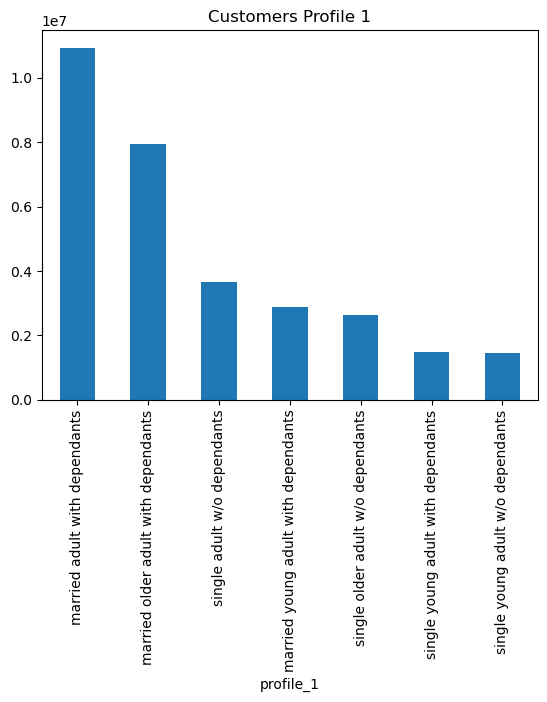

In [82]:
#Bar graph showing customers profile 1 counts
profile_1_bar=df_merged1['profile_1'].value_counts().plot.bar(title='Customers Profile 1')

In [84]:
#exporting Customer Profile Bar Chart
profile_1_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer Profile 1 Bar Chart.png'))

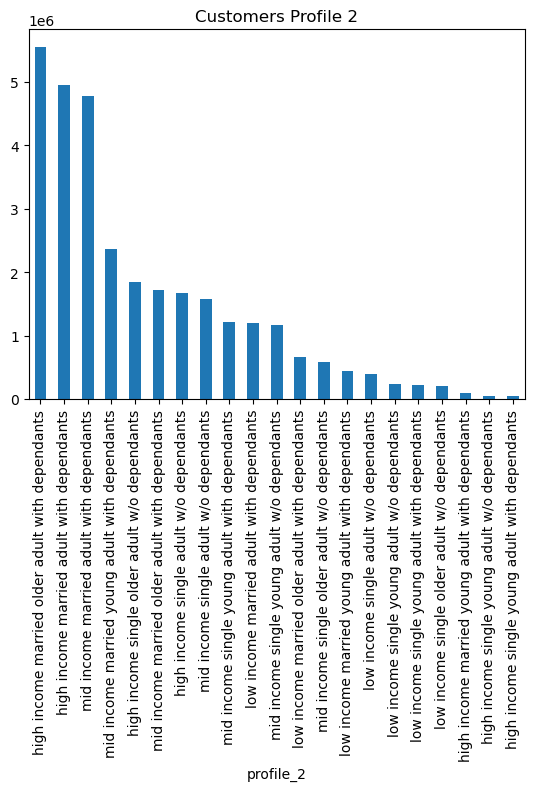

In [85]:
#Bar graph showing customers profile 2 counts
profile_2_bar=df_merged1['profile_2'].value_counts().plot.bar(title='Customers Profile 2')

In [86]:
#exporting Customer Profile Bar Chart
profile_2_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer Profile 2 Bar Chart.png'))

# 5. Aggregate the max, mean, and min variables 

In [87]:
#Aggregate minimum,maximum, and mean of cutomer's age for usage and expenditure 
age_group_agg=df_merged1.groupby('age_group')[['days_since_last_order','prices']].agg(['min','max','mean'])

In [88]:
age_group_agg

days_since_last_order                  prices           \
                                  min   max       mean    min      max   
age_group                                                                
18-29 years old                   0.0  30.0  10.815269    1.0  99999.0   
30-44 years old                   0.0  30.0  10.806643    1.0  99999.0   
45-59 years old                   0.0  30.0  10.823913    1.0  99999.0   
60-81 years old                   0.0  30.0  10.800665    1.0  99999.0   

                            
                      mean  
age_group                   
18-29 years old  12.198693  
30-44 years old  11.681223  
45-59 years old  12.275494  
60-81 years old  11.724449

In [89]:
#Aggregate minimum,maximum, and mean of cutomer's income for usage and expenditure 
income_group_agg=df_merged1.groupby('income_group')[['days_since_last_order','prices']].agg(['min','max','mean'])

In [90]:
income_group_agg

days_since_last_order                  prices           \
                                min   max       mean    min      max   
income_group                                                           
high income                     0.0  30.0  10.769624    1.0  99999.0   
lower income                    0.0  30.0  11.175808    1.0     25.0   
middle income                   0.0  30.0  10.762150    1.0  99999.0   

                          
                    mean  
income_group              
high income    16.461509  
lower income    6.707347  
middle income   8.442739

In [96]:
#Aggregate minimum,maximum, and mean of cutomer's dependants for usage and expenditure 
dependants_group_agg=df_merged1.groupby('dependants_group')[['days_since_last_order','prices']].agg(['min','max','mean'])

In [97]:
dependants_group_agg

days_since_last_order                  prices           \
                                   min   max       mean    min      max   
dependants_group                                                          
has dependants                     0.0  30.0  10.816416    1.0  99999.0   
no dependants                      0.0  30.0  10.791951    1.0  99999.0   

                             
                       mean  
dependants_group             
has dependants    11.877157  
no dependants     12.102657

In [95]:
df_merged1.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest-day',
       'busiest-days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spender_flag', 'median_order_frequency',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'marital_status', 'income', 'region',
       'activity_flag', 'department', 'age_group', 'income_group',
       'dependants_group', 'profile_1', 'profile_2'],
      dtype='object')

In [98]:
#Create a crosstab for frequency_flag and age_group
age_group_frequency=pd.crosstab(df_merged1['frequency_flag'],df_merged1['age_group'],dropna=False)

In [99]:
age_group_frequency

age_group              18-29 years old  30-44 years old  45-59 years old  \
frequency_flag                                                             
Frequent customer              3993750          4969564          4988944   
Non-frequent customer           539795           666820           697822   
Regular customer               1284058          1624982          1624325   

age_group              60-81 years old  
frequency_flag                          
Frequent customer              7252218  
Non-frequent customer           990538  
Regular customer               2331748

# 6. Compare your customer profiles 

In [104]:
#Group by customer profile and region
customers_profile1_region=df_merged1.groupby(['profile_1','region']).size().unstack()

In [105]:
#Sort 
customers_profile1_region=customers_profile1_region.loc[customers_profile1_region.sum(axis=1).sort_values(ascending=True).index]

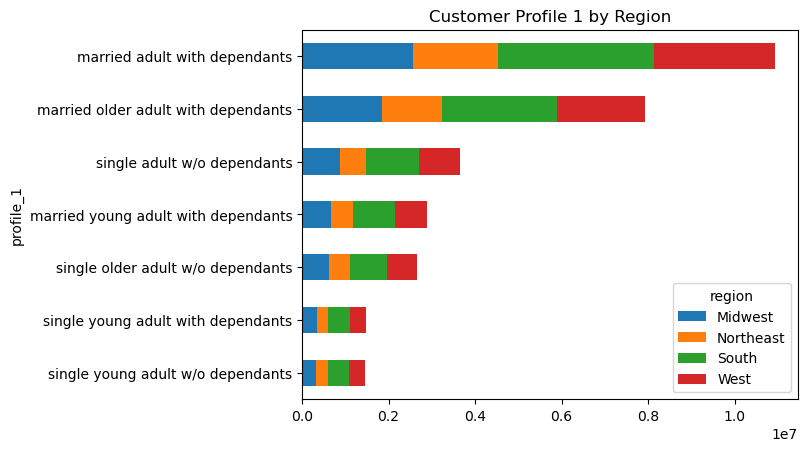

In [106]:
# Create bar chart
customers_profile1_region = customers_profile1_region.plot.barh(stacked = True, title ='Customer Profile 1 by Region')

In [ ]:
#The west region has the most married with dependants customers

In [108]:
#Group by customer profile and region
customers_profile2_region=df_merged1.groupby(['profile_2','region']).size().unstack()

In [109]:
#Sort 
customers_profile2_region=customers_profile2_region.loc[customers_profile2_region.sum(axis=1).sort_values(ascending=True).index]

In [110]:
# Create bar chart
customers_profile2_region = customers_profile2_region.plot.barh(stacked = True, title ='Customer Profile 2 by Region')

In [111]:
#exporting Customer Profile by region
customers_profile1_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer Profile 1 by Region.png'))

In [112]:
#exporting Customer Profile by region
customers_profile2_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customer Profile 2 by Region.png'))

In [113]:
#Group by customer profile and department 
customers_profile1_department=df_merged1.groupby(['profile_1','department']).size().unstack()

In [114]:
#Sort 
customers_profile1_department=customers_profile1_department.loc[customers_profile1_department.sum(axis=1).sort_values(ascending=True).index]

Text(0, 0.5, 'Department')

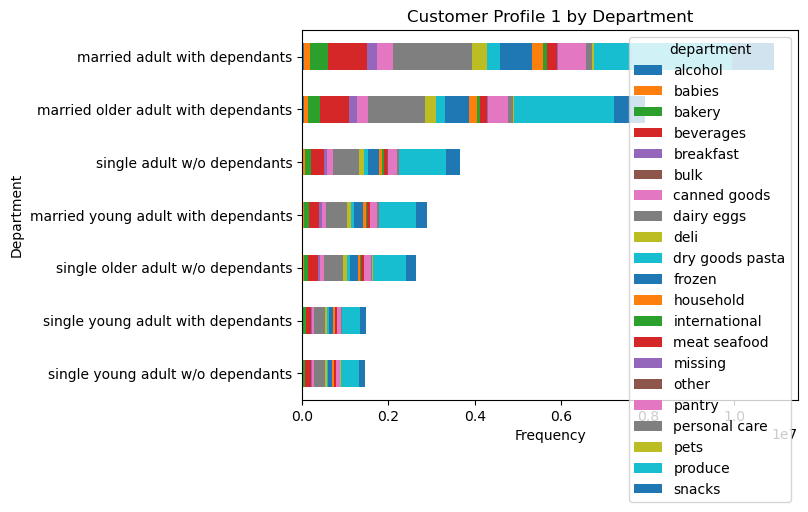

In [123]:
# Create bar chart
customers_profile1_department= customers_profile1_department.plot.barh(stacked = True, title ='Customer Profile 1 by Department')
plt.xlabel('Frequency')
plt.ylabel('Department')

In [ ]:
#Snacks and produce are the top deparments specially for married with dependants

In [124]:
#exporting Customer Profile 1 by department
customers_profile1_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customers Profile 1 by Department.png'))

In [125]:
#Group by customer profile and department 
customers_profile2_department=df_merged1.groupby(['profile_2','department']).size().unstack()

In [126]:
#Sort 
customers_profile2_department=customers_profile2_department.loc[customers_profile2_department.sum(axis=1).sort_values(ascending=True).index]

In [127]:
# Create bar chart
customers_profile2_department= customers_profile2_department.plot.barh(stacked = True, title ='Customer Profile 2 by Department')
plt.xlabel('Frequency')
plt.ylabel('Department')

Text(0, 0.5, 'Department')

In [128]:
#exporting Customer Profile 2 by department
customers_profile2_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Customers Profile 2 by Department.png'))